# 基于数据矩阵的奇异值分解算法

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
def loaddata():
    data = np.loadtxt('data/pca_data.csv',delimiter=',')
    return data

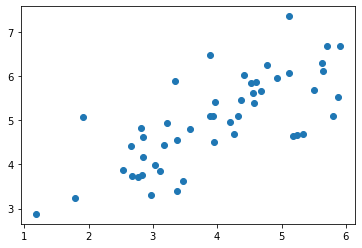

In [3]:
X = loaddata()
plt.scatter(X[:,0],X[:,1])
plt.show()

In [4]:
def featureNormalize(X):
    mu = np.mean(X,axis=0).reshape(1,-1)
    sigma = np.std(X,axis=0,ddof=1).reshape(1,-1)
    X = (X-mu)/sigma
    return X,mu,sigma

<img src="images/02.png" width="500" align="left" />

In [5]:
def pca(X,K):
    u,s,vT = np.linalg.svd(X,full_matrices=0)
    return X.dot(vT.T[:, 0:K]),u,s,vT

In [6]:
X,mu,sigma = featureNormalize(X)
Z,u,s,vT = pca(X,1)
print(Z)

[[-1.48127391]
 [ 0.91291229]
 [-1.21208656]
 [-1.62734009]
 [-1.26042409]
 [ 0.96700223]
 [-1.25605967]
 [ 2.31794969]
 [ 0.02968998]
 [ 0.77386123]
 [ 0.62532902]
 [ 0.54724542]
 [ 0.08878025]
 [ 0.520569  ]
 [-1.548434  ]
 [ 1.89684585]
 [ 0.87788459]
 [-0.94646472]
 [ 2.30653955]
 [ 0.4731351 ]
 [ 2.19518524]
 [-0.38509662]
 [ 1.76688508]
 [-0.0512347 ]
 [-1.64838858]
 [-0.50302869]
 [ 1.2246766 ]
 [ 1.16020771]
 [-0.83375215]
 [ 0.00686207]
 [ 0.22565101]
 [ 1.49788781]
 [-1.3252858 ]
 [ 0.58656923]
 [-0.67225099]
 [ 1.33938187]
 [-1.67053477]
 [ 1.37836539]
 [-2.53419743]
 [ 0.27570789]
 [ 0.96695982]
 [-0.8792732 ]
 [-1.28362916]
 [ 0.97972108]
 [-1.79450473]
 [ 0.26923019]
 [-3.16088618]
 [-1.20080033]
 [-0.36423084]
 [ 1.42814204]]


In [7]:
def recoverData(Z, v, K):
    V_reduce = v[:,0:K]
    X_rec = np.dot(Z,np.transpose(V_reduce))
    return X_rec


In [8]:
def plotData(X_orgin,X_rec):
    plt.scatter(X_orgin[:,0],X_orgin[:,1])
    plt.scatter(X_rec[:, 0], X_rec[:, 1],c='red')
    plt.show()

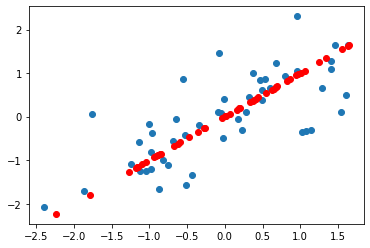

In [9]:
X_rec = recoverData(Z,vT,1)
plotData(X,X_rec)